**Doğrusal Regresyon (Linear Regression):**

 Bir bağımlı değişken ile bir veya daha fazla bağımsız değişken arasındaki doğrusal ilişkileri modelleyen bir istatistiksel yöntemdir

**1. Kütüphaneler:**

Bu kod, veri analizi, modelleme ve görselleştirme işlemleri için gereken çeşitli **Python** kütüphanelerini ve modüllerini içe aktarır. ***NumPy*** ve ***Pandas*** veri işleme ve manipülasyonu için, ***Seaborn*** ve ***Matplotlib*** veri görselleştirme için, ***Scikit-learn*** ise makine öğrenmesi ve model değerlendirmesi için kullanılır.

In [268]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer


**2. Veriyi Yükleme ve İnceleme:**

Veriyi yüklemek için pandas'ın read_csv fonksiyonunu kullanıyoruz.

In [269]:
bilgi=pd.read_csv("owid-covid-data.csv")
df=bilgi.copy()
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2/24/2020,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2/25/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2/26/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2/27/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2/28/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220338,ZWE,Africa,Zimbabwe,9/26/2022,257342.0,2.0,36.000,5599.0,0.0,0.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
220339,ZWE,Africa,Zimbabwe,9/27/2022,257376.0,34.0,31.429,5599.0,0.0,0.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
220340,ZWE,Africa,Zimbabwe,9/28/2022,257409.0,33.0,36.143,5602.0,3.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
220341,ZWE,Africa,Zimbabwe,9/29/2022,257409.0,0.0,21.429,5602.0,0.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220343 entries, 0 to 220342
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    220343 non-null  object 
 1   continent                                   207670 non-null  object 
 2   location                                    220343 non-null  object 
 3   date                                        220343 non-null  object 
 4   total_cases                                 211377 non-null  float64
 5   new_cases                                   211112 non-null  float64
 6   new_cases_smoothed                          209916 non-null  float64
 7   total_deaths                                192273 non-null  float64
 8   new_deaths                                  192215 non-null  float64
 9   new_deaths_smoothed                         191035 non-null  float64
 

In [271]:
#  total_deaths null olan stunları kaldırma

df.dropna(subset=['total_deaths'], inplace=True)


**4. LabelEncoder ile Sayısal Veriye Dönüştürme:**

Bu kod, veri çerçevesindeki kategorik sütunları sayısal verilere dönüştürmek için LabelEncoder kullanır. Böylece sayısal veri gerektiren algoritmaların (örneğin, K-Means kümeleme gibi) bu verileri işleyebilmesi sağlanır. Kategorik veriler genellikle metin değerleridir ve bu metin değerlerini sayılara dönüştürmek, makine öğrenmesi modellerinin performansını artırabilir.

In [272]:
#  labelencoder ile nun numericleri numeric yapma

from sklearn.preprocessing import LabelEncoder

# LabelEncoder nesnesi oluştur
le = LabelEncoder()

# Sadece kategorik sütunları seç
categorical_cols = df.select_dtypes(include=['object']).columns

# Her kategorik sütunu dönüştür
for col in categorical_cols:
  df[col] = le.fit_transform(df[col].astype(str))



* **LabelEncoder:** Kategorik verileri sayısal verilere dönüştürmek için kullanılan bir sınıftır. Her benzersiz kategoriye bir tam sayı atar.
* **df.select_dtypes(include=['object']):** Veri çerçevesindeki yalnızca kategorik sütunları seçer. Kategorik sütunlar genellikle veri türü olarak 'object' (yazı veya metin) olan sütunlardır.
for col in categorical_cols: Kategorik sütunların her birini döngüyle işler.

* **df[col].astype(str):** Her bir sütunu str (yazı) türüne dönüştürür. Bu adım, LabelEncoder'ın tüm değerleri bir string olarak görmesini sağlar.

* **le.fit_transform(df[col]):** LabelEncoder'ı kullanarak, sütundaki benzersiz kategorilere sayısal değerler atar. fit_transform metodu iki işlemi bir arada yapar:

* **fit:** Kategorik verilerin benzersiz değerlerini öğrenir.
transform: Bu benzersiz değerleri sayısal değerlere dönüştürür.
* **df[col] = ...:** Dönüştürülmüş sayısal değerleri, orijinal veri çerçevesindeki ilgili sütunla değiştirir.

**5. Eksik Verileri Doldurma:**

Bu kod, veri çerçevesindeki eksik değerleri SimpleImputer kullanarak doldurur. Burada kullanılan strateji, eksik değerleri sütunlardaki mevcut sayısal değerlerin ortalaması ile doldurmak üzerinedir. Eksik verilerin doldurulması, makine öğrenmesi algoritmalarının ve diğer veri işleme yöntemlerinin düzgün çalışması için önemlidir.

In [273]:
#  nan değerleri mean ile doldurma

imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

**6. Bütün Sütunlar için Normalizasyon İşlemleri:**

Bu kod, veri çerçevesindeki tüm sayısal sütunları **Min-Max** normalizasyonu kullanarak [0, 1] aralığına ölçeklendirir. İlk olarak, sayısal sütunlar seçilir. Ardından, bu sütunlara **Min-Max** normalizasyonu uygulanarak her sütunun değerleri [0, 1] aralığında dönüştürülür. Bu işlem, verilerin karşılaştırılabilir olmasını sağlar ve bazı makine öğrenmesi algoritmalarının performansını artırabilir. Son olarak, normalizasyon sonrası veri çerçevesi yazdırılır.

In [274]:
#  bütün sütunlar için normalizasyon yapma

from sklearn.preprocessing import MinMaxScaler

# Sadece sayısal sütunları seçin
numerical_cols = df.select_dtypes(include=np.number).columns

# MinMaxScaler nesnesi oluşturun
scaler = MinMaxScaler()

# Sayısal sütunları normalize edin
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Normalize edilmiş veri çerçevesini yazdırın
print(df)


        iso_code  continent  location      date   total_cases     new_cases  \
0       0.004425   0.166667       0.0  0.393075  6.314932e-08  1.470004e-06   
1       0.004425   0.166667       0.0  0.396130  6.638774e-08  4.900014e-07   
2       0.004425   0.166667       0.0  0.399185  1.182026e-07  7.840022e-06   
3       0.004425   0.166667       0.0  0.402240  1.279178e-07  1.470004e-06   
4       0.004425   0.166667       0.0  0.405295  1.457292e-07  2.695008e-06   
...          ...        ...       ...       ...           ...           ...   
192268  1.000000   0.000000       1.0  0.966395  4.166900e-04  4.900014e-07   
192269  1.000000   0.000000       1.0  0.969450  4.167450e-04  8.330024e-06   
192270  1.000000   0.000000       1.0  0.972505  4.167984e-04  8.085023e-06   
192271  1.000000   0.000000       1.0  0.975560  4.167984e-04  0.000000e+00   
192272  1.000000   0.000000       1.0  0.981670  4.168891e-04  1.372004e-05   

        new_cases_smoothed  total_deaths  new_death

**7. Bağımlı ve Bağımsız Değişkene Ayırma:**

Bu kod, df veri çerçevesindeki **bağımsız (özellik)** ve **bağımlı (hedef)** değişkenleri ayırır. Bağımsız değişkenler (X), total_deaths sütunu hariç tüm sütunları içerir. Bağımlı değişken (y) ise sadece **total_deaths** sütununu içerir. Bu ayrım, makine öğrenmesi modellerinde modelin tahmin yapacağı hedef değişkeni belirlemek ve modelin öğrenmesi için gerekli özellikleri sağlamak amacıyla yapılır.

In [275]:
X = df.drop('total_deaths', axis=1)  # Bağımsız değişken
y = df['total_deaths'] #Bağımlı değişken

In [276]:
X

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,new_deaths,new_deaths_smoothed,total_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,0.004425,0.166667,0.0,0.393075,6.314932e-08,1.470004e-06,7.069007e-07,0.000056,0.009571,0.000002,...,0.239172,0.352256,0.373762,0.029197,0.345085,0.207815,0.069744,0.364391,0.235708,0.279995
1,0.004425,0.166667,0.0,0.396130,6.638774e-08,4.900014e-07,7.482263e-07,0.000000,0.009571,0.000002,...,0.239172,0.352256,0.373762,0.029197,0.345085,0.207815,0.069744,0.364391,0.235708,0.279995
2,0.004425,0.166667,0.0,0.399185,1.182026e-07,7.840022e-06,2.078794e-06,0.000000,0.009571,0.000003,...,0.239172,0.352256,0.373762,0.029197,0.345085,0.207815,0.069744,0.364391,0.235708,0.279995
3,0.004425,0.166667,0.0,0.402240,1.279178e-07,1.470004e-06,2.328203e-06,0.000056,0.009571,0.000003,...,0.239172,0.352256,0.373762,0.029197,0.345085,0.207815,0.069744,0.364391,0.235708,0.279995
4,0.004425,0.166667,0.0,0.405295,1.457292e-07,2.695008e-06,2.785404e-06,0.000000,0.009571,0.000003,...,0.239172,0.352256,0.373762,0.029197,0.345085,0.207815,0.069744,0.364391,0.235708,0.279995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192268,1.000000,0.000000,1.0,0.966395,4.166900e-04,4.900014e-07,1.047691e-05,0.000000,0.000010,0.024519,...,0.034169,0.326705,0.363998,0.116788,0.245294,0.314387,0.069744,0.364391,0.235708,0.279995
192269,1.000000,0.000000,1.0,0.969450,4.167450e-04,8.330024e-06,9.146637e-06,0.000000,0.000010,0.024522,...,0.034169,0.326705,0.363998,0.116788,0.245294,0.314387,0.069744,0.364391,0.235708,0.279995
192270,1.000000,0.000000,1.0,0.972505,4.167984e-04,8.085023e-06,1.051853e-05,0.000169,0.000038,0.024526,...,0.034169,0.326705,0.363998,0.116788,0.245294,0.314387,0.069744,0.364391,0.235708,0.279995
192271,1.000000,0.000000,1.0,0.975560,4.167984e-04,0.000000e+00,6.236383e-06,0.000000,0.000038,0.024526,...,0.034169,0.326705,0.363998,0.116788,0.245294,0.314387,0.069744,0.364391,0.235708,0.279995


**8. Korelasyon Matrisi Çıkarma ve Yazdırma:**

Bu kod, bağımsız değişkenler arasındaki ilişkileri gösteren bir **korelasyon** matrisini hesaplar ve bu matrisi bir **ısı haritası** olarak görselleştirir. **Isı haritası**, her değişken çiftinin **korelasyon** katsayısını renkler ve sayısal değerlerle gösterir, böylece değişkenler arasındaki ilişkileri hızlı ve görsel bir şekilde değerlendirebilirsiniz.

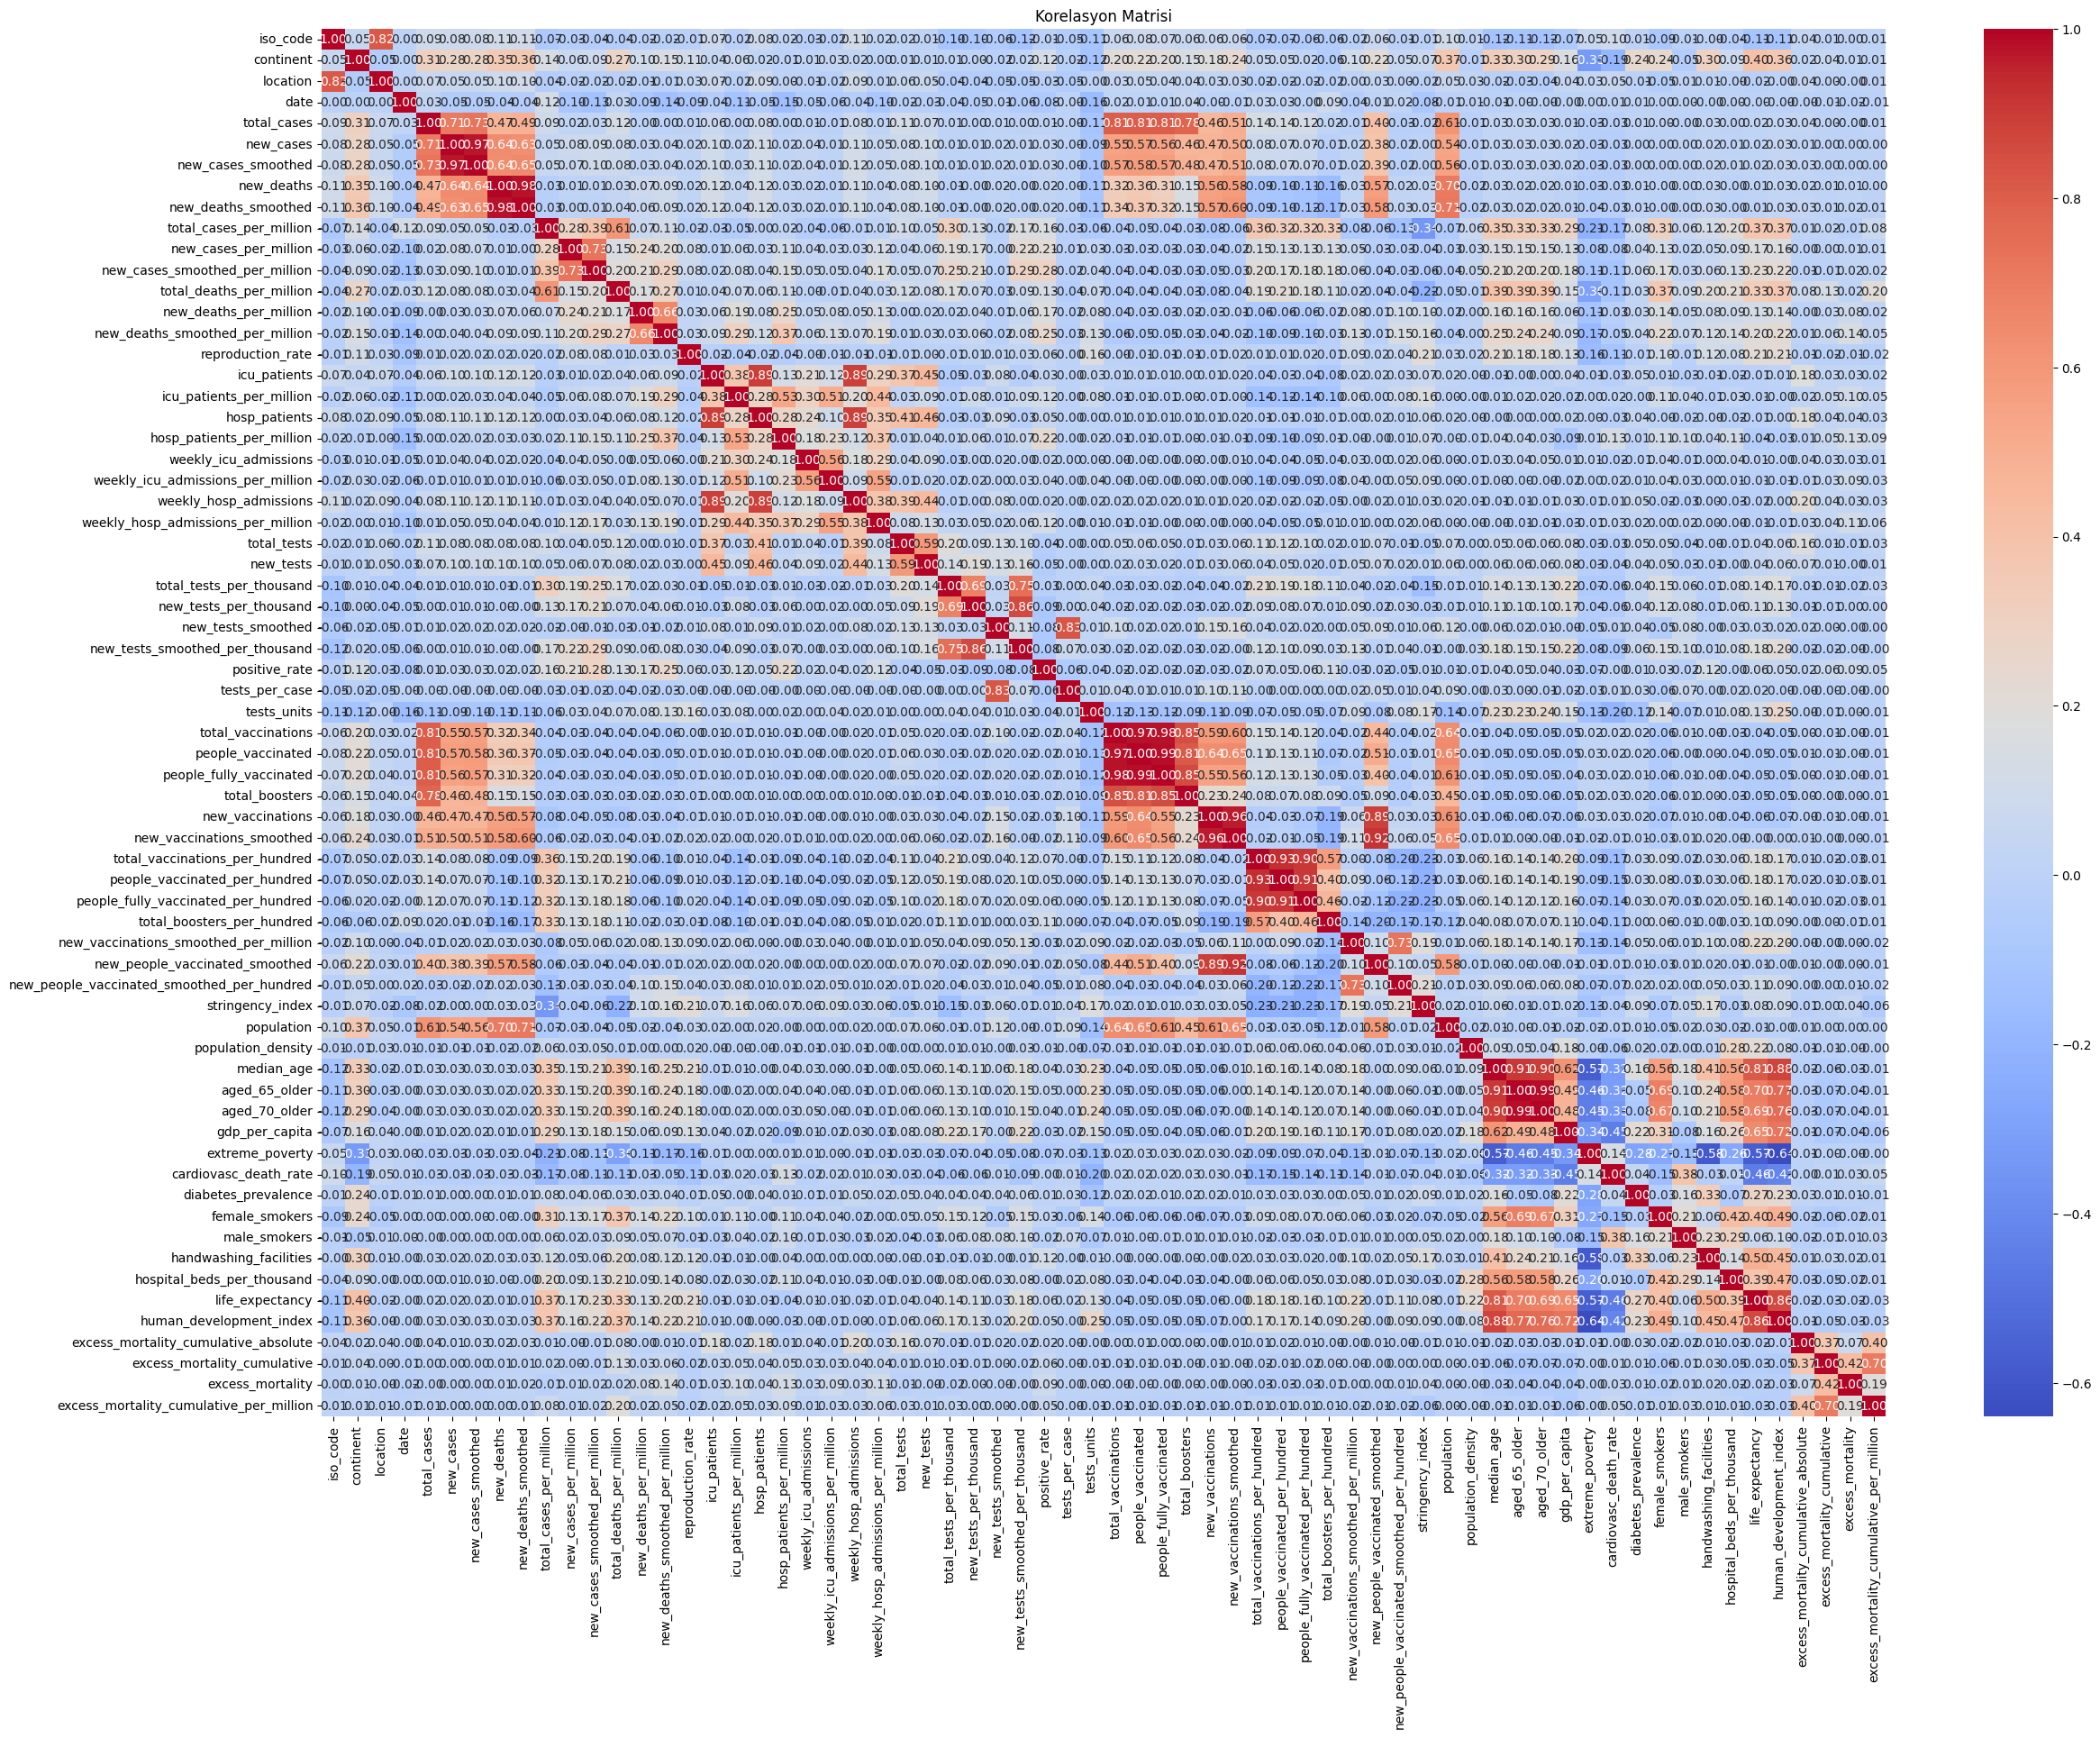

In [277]:
# korelasyon matrisi çıkar x için, ve plot ile yazdırma

correlation_matrix = X.corr()
plt.figure(figsize=(28, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasyon Matrisi')
plt.show()


In [278]:
X

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,new_deaths,new_deaths_smoothed,total_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,0.004425,0.166667,0.0,0.393075,6.314932e-08,1.470004e-06,7.069007e-07,0.000056,0.009571,0.000002,...,0.239172,0.352256,0.373762,0.029197,0.345085,0.207815,0.069744,0.364391,0.235708,0.279995
1,0.004425,0.166667,0.0,0.396130,6.638774e-08,4.900014e-07,7.482263e-07,0.000000,0.009571,0.000002,...,0.239172,0.352256,0.373762,0.029197,0.345085,0.207815,0.069744,0.364391,0.235708,0.279995
2,0.004425,0.166667,0.0,0.399185,1.182026e-07,7.840022e-06,2.078794e-06,0.000000,0.009571,0.000003,...,0.239172,0.352256,0.373762,0.029197,0.345085,0.207815,0.069744,0.364391,0.235708,0.279995
3,0.004425,0.166667,0.0,0.402240,1.279178e-07,1.470004e-06,2.328203e-06,0.000056,0.009571,0.000003,...,0.239172,0.352256,0.373762,0.029197,0.345085,0.207815,0.069744,0.364391,0.235708,0.279995
4,0.004425,0.166667,0.0,0.405295,1.457292e-07,2.695008e-06,2.785404e-06,0.000000,0.009571,0.000003,...,0.239172,0.352256,0.373762,0.029197,0.345085,0.207815,0.069744,0.364391,0.235708,0.279995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192268,1.000000,0.000000,1.0,0.966395,4.166900e-04,4.900014e-07,1.047691e-05,0.000000,0.000010,0.024519,...,0.034169,0.326705,0.363998,0.116788,0.245294,0.314387,0.069744,0.364391,0.235708,0.279995
192269,1.000000,0.000000,1.0,0.969450,4.167450e-04,8.330024e-06,9.146637e-06,0.000000,0.000010,0.024522,...,0.034169,0.326705,0.363998,0.116788,0.245294,0.314387,0.069744,0.364391,0.235708,0.279995
192270,1.000000,0.000000,1.0,0.972505,4.167984e-04,8.085023e-06,1.051853e-05,0.000169,0.000038,0.024526,...,0.034169,0.326705,0.363998,0.116788,0.245294,0.314387,0.069744,0.364391,0.235708,0.279995
192271,1.000000,0.000000,1.0,0.975560,4.167984e-04,0.000000e+00,6.236383e-06,0.000000,0.000038,0.024526,...,0.034169,0.326705,0.363998,0.116788,0.245294,0.314387,0.069744,0.364391,0.235708,0.279995


**9. Veri Setini Yükleme:**

Bu kod, veri kümesini eğitim ve test setlerine ayırır. Eğitim seti **(X_train ve y_train)**, modelin öğrenme sürecinde kullanılırken, test seti (**X_test ve y_test)** modelin performansını değerlendirmek için kullanılır. Test seti, modelin daha önce görmediği verilerle test edilmesini sağlar, böylece modelin genelleme yeteneği değerlendirilir. **test_size=0.2** parametresi, veri kümesinin %20'sinin test seti olarak ayrılmasını sağlar ve **random_state=42** parametresi, veri kümesinin bölünme işleminin tutarlı ve tekrar edilebilir olmasını sağlar.

In [279]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**10. Doğrusal REgresyon Modelini Oluşturma:**

Bu kod, doğrusal regresyon modelini (**LinearRegression** sınıfı) oluşturur ve bu modeli, eğitim verileri **(X_train, y_train)** ile eğitir. **fit** metodu, modelin bağımsız değişkenler ve bağımlı değişken arasındaki ilişkiyi öğrenmesini sağlar. Modelin öğrenme süreci, en uygun doğrusal ilişkiyi bulmayı ve bu ilişkileri belirleyen parametreleri optimize etmeyi içerir. Eğitim tamamlandığında, model, eğitim verilerinde öğrendiği ilişkilere dayanarak tahminler yapmaya hazır olacaktır.

In [280]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**11. Modelin Tahmin Yapması ve Başarı Ölçümleri:**

Bu kod, eğitim tamamlanan **doğrusal regresyon** modelinin performansını test verileri üzerinde değerlendirir. **model.predict** metodu, test verileri için tahminler yapar. **mean_squared_error** ve **r2_score** metotları, modelin tahminlerinin doğruluğunu ölçen metrikleri hesaplar. **MSE**, tahmin hatalarının büyüklüğünü ölçerken,**R^2** Skoru modelin hedef değişkenin varyansını ne kadar iyi açıkladığını değerlendirir. Sonuçlar ekrana yazdırılarak modelin performansı hakkında bilgi verilir.

In [281]:
y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Ortalama Karesel Hata:", mse)
print("R^2 Score:", r2)

Ortalama Karesel Hata: 0.00013568321634793324
R^2 Score: 0.9504300582832846


**12. Karışıklık Matrisini Hesaplama ve Görselleştirme:**

Bu kod, bir sınıflandırma modelinin performansını değerlendirmek için **karışıklık** matrisini hesaplar ve görselleştirir. Önce modelin tahminlerini ve gerçek değerleri ikili sınıflara dönüştürür. Daha sonra, bu ikili sınıfları kullanarak **karışıklık** matrisini oluşturur ve matrisin görselleştirilmesini sağlar. **Karışıklık** matrisinin görselleştirilmesi, modelin doğruluğunu ve tahmin performansını daha iyi anlamanızı sağlar.

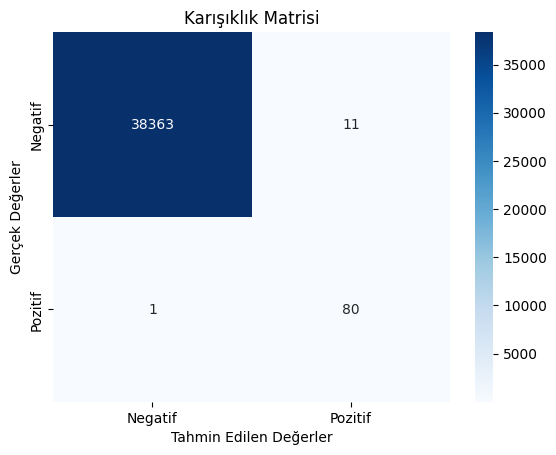

In [282]:

threshold = 0.5
y_pred_binary = [1 if pred >= threshold else 0 for pred in y_pred]


y_test_binary = [1 if val >= threshold else 0 for val in y_test]

cm = confusion_matrix(y_test_binary, y_pred_binary)

# Matrisin görselleştirilmesi
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Pozitif'], yticklabels=['Negatif', 'Pozitif'])
plt.ylabel('Gerçek Değerler')
plt.xlabel('Tahmin Edilen Değerler')
plt.title('Karışıklık Matrisi')
plt.show()

**13. Metrik Hesaplama:**

Bu kod, bir sınıflandırma modelinin performansını değerlendirmek için çeşitli metrikleri hesaplar:

* **Doğruluk(accuracy):** Modelin genel başarısını ölçer.
* **Kesinlik(precision):** Pozitif tahminlerin doğruluğunu ölçer.
* **Duyarlılık(recall):** Gerçek pozitif örneklerin doğru tahmin edilme oranını ölçer.
* **F1 Puanı(F1 score)**: Kesinlik ve duyarlılığın dengeli bir ölçüsüdür.

Her bir performans metriği, modelin farklı yönlerini değerlendirir ve genellikle sınıflandırma modelinin başarısını analiz etmek için bir arada kullanılır.

In [283]:

threshold = 0.5
y_pred_binary = [1 if pred >= threshold else 0 for pred in y_pred]

y_test_binary = [1 if val >= threshold else 0 for val in y_test]

accuracy = accuracy_score(y_test_binary, y_pred_binary)
print("Doğruluk (Accuracy):", accuracy)

# Kesinlik (Precision)
precision = precision_score(y_test_binary, y_pred_binary, average='binary')
print("Kesinlik (Precision):", precision)

# Duyarlılık (Recall)
recall = recall_score(y_test_binary, y_pred_binary, average='binary')
print("Duyarlılık (Recall):", recall)

# F1 Puanı (F1 Score)
f1 = f1_score(y_test_binary, y_pred_binary, average='binary')
print("F1 Puanı (F1 Score):", f1)

Doğruluk (Accuracy): 0.9996879469509816
Kesinlik (Precision): 0.8791208791208791
Duyarlılık (Recall): 0.9876543209876543
F1 Puanı (F1 Score): 0.9302325581395348
